In [ ]:
# This code uses https://www.kaggle.com/code/electrichands/spotify-similarity-based/notebook, licensed under Apache License 2.0.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data Loading

In [ ]:
import pandas

songs_df = pd.read_csv('/content/songs_db.csv')

In [ ]:
ratings_df = pd.read_excel('/content/ratings.xlsx')

In [ ]:
songs_df.head()

,SongID,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,YouTube URL
0,0,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance,https://www.youtube.com/watch?v=Uq9gPaIzbe8&pp...
1,1,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop,https://www.youtube.com/watch?v=A_g3lMcWVy0&pp...
2,2,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop,https://www.youtube.com/watch?v=90RLzVUuXe4&pp...
3,3,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton,https://www.youtube.com/watch?v=A7m8lQOMz1A&pp...
4,4,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,...,0,0.2530,0.09930,0.000291,0.126,0.187,106.672,4,reggae,https://www.youtube.com/watch?v=Cr8K88UcO0s&pp...


In [ ]:
songs_df.columns


Index(['SongID', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'YouTube URL'],
      dtype='object')

In [ ]:
songs_df.shape

(5000, 22)

In [ ]:
print(len(songs_df['SongID']))

5000


## EDA

In [ ]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SongID            5000 non-null   int64  
 1   track_id          5000 non-null   object 
 2   artists           5000 non-null   object 
 3   album_name        5000 non-null   object 
 4   track_name        5000 non-null   object 
 5   popularity        5000 non-null   int64  
 6   duration_ms       5000 non-null   int64  
 7   explicit          5000 non-null   bool   
 8   danceability      5000 non-null   float64
 9   energy            5000 non-null   float64
 10  key               5000 non-null   int64  
 11  loudness          5000 non-null   float64
 12  mode              5000 non-null   int64  
 13  speechiness       5000 non-null   float64
 14  acousticness      5000 non-null   float64
 15  instrumentalness  5000 non-null   float64
 16  liveness          5000 non-null   float64


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 5001 entries, Unnamed: 0 to 5260
dtypes: int64(5001)
memory usage: 76.3 MB


### Check Missing Values

In [ ]:
songs_df.shape

(5000, 22)

In [ ]:
sorted_songs_df = songs_df.sort_values(by='popularity', ascending=False)

In [ ]:
sorted_songs_df.shape


(5000, 22)

In [ ]:
sorted_songs_df.isnull().sum()

SongID              0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
YouTube URL         0
dtype: int64

In [ ]:
sorted_songs_df = sorted_songs_df.dropna()

In [ ]:
sorted_songs_df.isnull().sum()

SongID              0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
YouTube URL         0
dtype: int64

In [ ]:
sorted_songs_df.shape

(5000, 22)

In [ ]:
sorted_songs_df_with_duplicates = sorted_songs_df.copy()

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'track_id' is the column containing track IDs
num_duplicates = sorted_songs_df.duplicated('track_id').sum()
print("Number of duplicate track IDs:", num_duplicates)

# Drop rows with duplicate track IDs
sorted_songs_df.drop_duplicates('track_id', inplace=True)

# Confirm that duplicates have been dropped
print("Number of unique track IDs after dropping duplicates:", len(sorted_songs_df))

Number of duplicate track IDs: 0
Number of unique track IDs after dropping duplicates: 5000


In [ ]:
sorted_songs_df.shape

(5000, 22)

In [ ]:
sorted_songs_df.describe()

,SongID,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,72.258400,218340.57700,0.608154,0.657153,5.352000,-7.044052,0.612600,0.080615,0.249634,0.046691,0.177177,0.503068,121.220211,3.943400
std,1443.520003,5.656326,59486.08332,0.155976,0.207116,3.539068,3.998727,0.487205,0.082042,0.276249,0.169607,0.135351,0.232652,28.652813,0.311474
min,0.000000,65.000000,44698.00000,0.000000,0.000099,0.000000,-38.523000,0.000000,0.000000,0.000005,0.000000,0.020200,0.000000,0.000000,0.000000
25%,1249.750000,68.000000,180816.50000,0.508000,0.524750,2.000000,-8.474000,0.000000,0.035000,0.023100,0.000000,0.093500,0.324000,99.049500,4.000000
50%,2499.500000,71.000000,210994.50000,0.619000,0.689000,5.000000,-6.190000,1.000000,0.048700,0.132000,0.000005,0.123000,0.494000,120.023000,4.000000
75%,3749.250000,75.000000,245906.75000,0.724000,0.822000,8.000000,-4.613500,1.000000,0.085100,0.409000,0.000817,0.223000,0.684000,138.997000,4.000000
max,4999.000000,100.000000,811077.00000,0.980000,0.997000,11.000000,0.175000,1.000000,0.828000,0.996000,1.000000,0.951000,0.992000,208.951000,5.000000


In [ ]:
from scipy import stats

# Define a function to find outliers using Z-score
def find_outliers(dataframe, column_name):
    # Calculate Z-scores
    z_scores = stats.zscore(dataframe[column_name])
    # Define a threshold for identifying outliers
    threshold = 3
    # Get boolean array of outliers
    outliers = (z_scores > threshold) | (z_scores < -threshold)
    # Return the dataframe of outliers
    return dataframe[outliers]

# Find outliers for each numerical column in the dataset
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
outliers_dict = {}

for column in numerical_columns:
    outliers_dict[column] = find_outliers(sorted_songs_df, column)

# Print the number of outliers for each column
for column, outliers_df in outliers_dict.items():
    print(f"{column} has {len(outliers_df)} outliers.")

popularity has 42 outliers.
duration_ms has 58 outliers.
danceability has 18 outliers.
energy has 43 outliers.
loudness has 73 outliers.
speechiness has 138 outliers.
acousticness has 0 outliers.
instrumentalness has 192 outliers.
liveness has 131 outliers.
valence has 0 outliers.
tempo has 6 outliers.


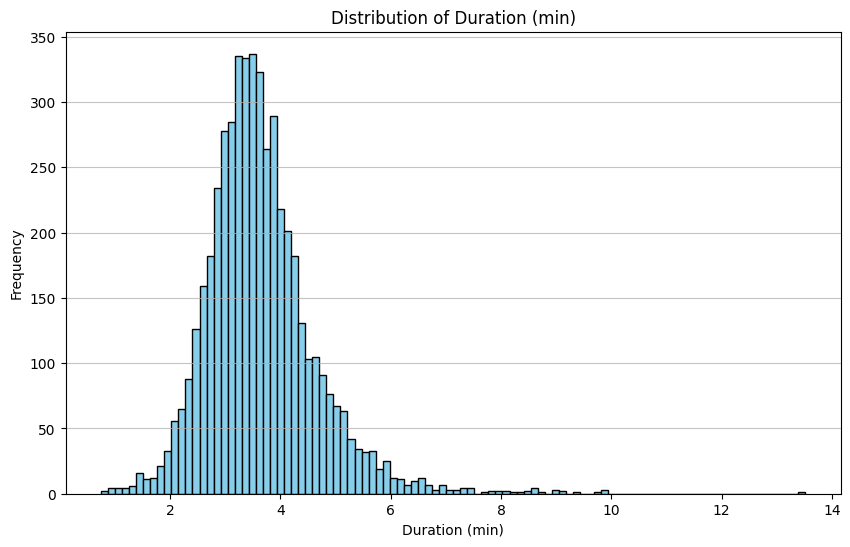

In [ ]:
import matplotlib.pyplot as plt

# Convert duration_ms to minutes
sorted_songs_df['duration_min'] = sorted_songs_df['duration_ms'] / 60000

# Plot the distribution of duration_min
plt.figure(figsize=(10, 6))
plt.hist(sorted_songs_df['duration_min'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration (min)')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
import numpy as np

# Define the bin edges for the intervals
bin_edges = np.arange(0, sorted_songs_df['duration_min'].max() + 5, 5)

# Use cut to create bins
sorted_songs_df['duration_interval'] = pd.cut(sorted_songs_df['duration_min'], bins=bin_edges)

# Create a histogram dataframe
histogram_df = sorted_songs_df['duration_interval'].value_counts().sort_index().reset_index()
histogram_df.columns = ['Duration Interval (min)', 'Frequency']

# Print the histogram dataframe
display(histogram_df)

,Duration Interval (min),Frequency
0,"(0.0, 5.0]",4602
1,"(5.0, 10.0]",397
2,"(10.0, 15.0]",1


In [ ]:
# Filter songs with duration over 10 minutes or below 1 minute
duration_outliers = sorted_songs_df[(sorted_songs_df['duration_min'] > 12) | (sorted_songs_df['duration_min'] < 0.5)]

# Print the songs with duration over 10 minutes or below 1 minute
display(duration_outliers[['track_name', 'artists', 'album_name', 'track_genre', 'duration_min']])

,track_name,artists,album_name,track_genre,duration_min
4339,Shine On You Crazy Diamond (Pts. 1-5),Pink Floyd,Wish You Were Here,psych-rock,13.51795


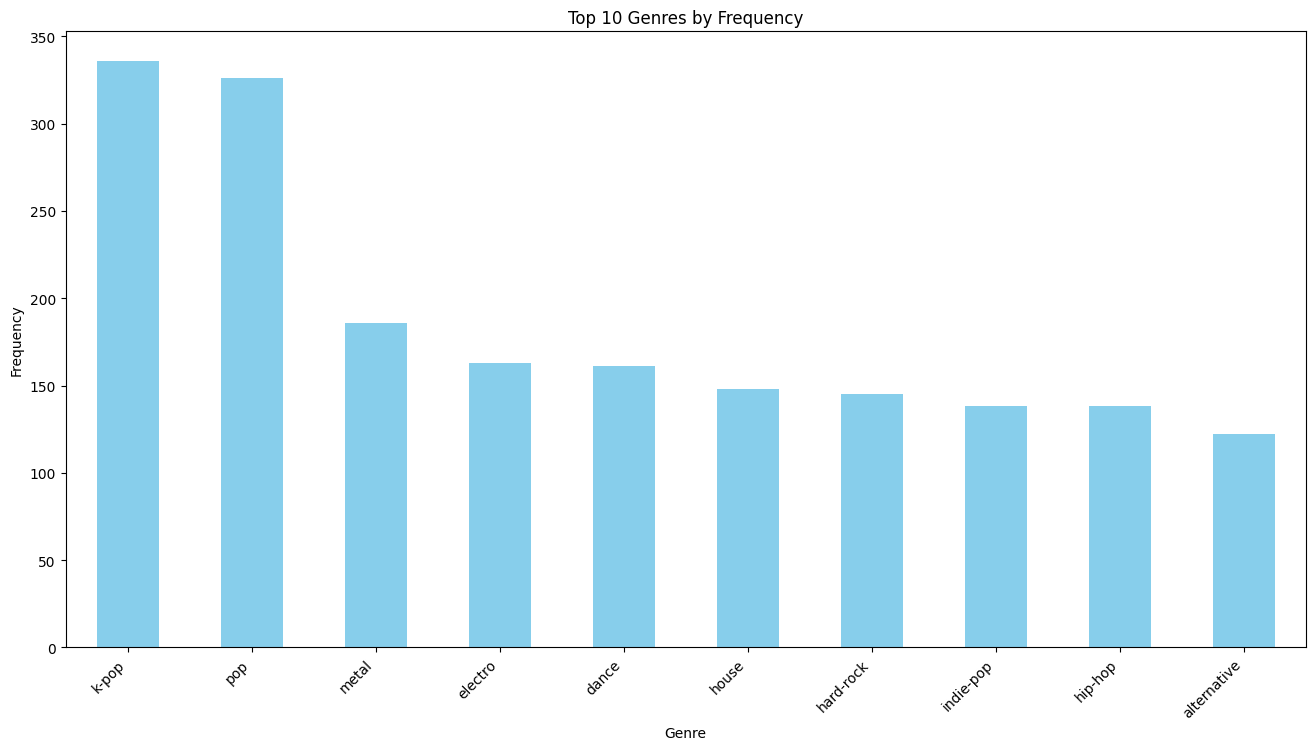

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 genres by frequency
top_genres = sorted_songs_df['track_genre'].value_counts().head(10)

# Plot a bar chart
plt.figure(figsize=(16, 8))
top_genres.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Top 10 Genres by Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
sorted_songs_df.shape

(5000, 24)

### Features Engineering

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227139 sha256=b05f94502a68b6cdb4ddaa4c06b6659c4abef7772d6516851d5f5e8c6ec95c1b
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext

# Combine the text columns into a single string for each row and save to a text file
text_data = sorted_songs_df['artists'] + ' ' + sorted_songs_df['track_name'] + ' ' + sorted_songs_df['album_name'] + ' ' + sorted_songs_df['track_genre']
text_data.to_csv('text_data.txt', index=False, header=False)


# Train the fastText model on the text data

model = fasttext.train_unsupervised('text_data.txt', model='skipgram')

In [ ]:
def get_mean_embedding(words_list, model):
    embeddings = [model.get_word_vector(word) for word in words_list]
    mean_embedding = np.mean(embeddings, axis=0)
    return mean_embedding

# Function to handle multiple artists and get their mean embedding
def get_artists_embedding(artists, model):
    # Split the artists string into individual artists
    artists_list = artists.split(';')
    # Get the mean embedding for the list of artists
    return get_mean_embedding(artists_list, model)

In [ ]:
from sklearn.preprocessing import StandardScaler

def get_track_embedding(track, model):
    # Get the embeddings as before
    artists_embedding = get_artists_embedding(track['artists'], model)
    track_name_embedding = get_mean_embedding(track['track_name'].split(), model)
    album_name_embedding = get_mean_embedding(track['album_name'].split(), model)
    track_genre_embedding = get_mean_embedding(track['track_genre'].split(), model)

    # Get the numerical features
    numerical_features = np.array([track['popularity'], track['duration_ms'], track['danceability'], track['loudness'], track['energy'], track['speechiness'], track['instrumentalness'], track['liveness'], track['valence'], track['tempo']])



    # Normalize the numerical features to have the same scale as the embeddings
    # This step is important to ensure that the numerical features do not dominate the embeddings
    scaler = StandardScaler()
    normalized_numerical_features = scaler.fit_transform(numerical_features.reshape(-1, 1))

    # Flatten the normalized numerical features to 1D
    normalized_numerical_features = normalized_numerical_features.flatten()

    # Concatenate the embeddings and the numerical features
    final_embedding = artists_embedding + track_name_embedding + album_name_embedding + track_genre_embedding
    final_embedding = np.concatenate([final_embedding, normalized_numerical_features])

    return final_embedding

In [ ]:
# Calculate embeddings for all tracks
sorted_songs_df['embedding'] = sorted_songs_df.apply(lambda x: get_track_embedding(x, model), axis=1)

In [ ]:
len(sorted_songs_df['embedding'][0])

110

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552451 sha256=b0b882e838da7b92a32faf9c0651b6f459388a3cf3a8af85a67fe3d611a6c08d
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [ ]:
from annoy import AnnoyIndex

# Initialize the Annoy Index based on length of embeddings with cosine as measure for neighbours
t = AnnoyIndex(len(sorted_songs_df['embedding'][0]), 'angular')

# Build the Annoy index
for i, row in sorted_songs_df.iterrows():
    t.add_item(i, row['embedding'])

# Build the index, 10 trees are being used in this example
t.build(10)

True

In [ ]:
sorted_songs_df[sorted_songs_df['artists'].str.contains('BLACK')]

In [ ]:
def knn_based_recommendations(index):

  if index >=5000:
    return []


  # Get the embedding of the random track
  random_track_embedding = sorted_songs_df.loc[index, 'embedding']

  # Find the 10 nearest neighbors to the random track
  nearest_neighbors_indices = t.get_nns_by_vector(random_track_embedding, 10)

  # Get the details of the recommended tracks
  recommended_tracks = sorted_songs_df.loc[nearest_neighbors_indices]

  return list(recommended_tracks['SongID'])




In [ ]:
def build_knn_map():
  knn_map_for_all_SongIDs= {}
  for SongID in range(len(sorted_songs_df['SongID'])):
    knn_map_for_all_SongIDs[SongID] = knn_based_recommendations(SongID)


  return knn_map_for_all_SongIDs



In [ ]:
index = 5
print(knn_based_recommendations(5))

[5, 36, 4, 11, 301, 108, 155, 6, 124, 170]


In [ ]:
knn_map_for_all_SongIDs = build_knn_map()

In [ ]:
knn_map_for_all_SongIDs[5]

[5, 36, 4, 11, 301, 108, 155, 6, 124, 170]

In [ ]:
ratings_df.head()
ratings_df['user_id'] = ratings_df.index
ratings_df.set_index(['user_id'],inplace=True)
ratings_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
ratings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5250,5243,5244,5245,5246,5247,5248,5249,5251,5260
user_id,,,,,,,,,,,,,,,,,,,,,
0,4,5,4,0,3,3,3,5,3,0,...,5,5,4,4,0,0,0,4,4,4
1,5,5,4,3,1,1,3,0,2,2,...,5,4,4,5,0,5,5,5,5,5
2,5,4,4,3,3,1,0,5,1,2,...,5,4,5,4,1,1,5,5,4,0
3,4,5,4,1,3,1,2,4,0,3,...,4,4,5,5,4,4,4,4,5,4
4,4,5,5,2,3,1,2,4,2,2,...,5,4,5,4,5,5,0,0,5,4


In [ ]:
def get_top_2_rated_SongIDs(ratings_df, ratings_list=[4, 5]):
    temp = {}
    for user_id, row in ratings_df.iterrows():
        temp[user_id] = row[row.isin(ratings_list)].index.tolist()
    return temp


In [ ]:

top_2_rated_SongIDs_for_all_users=get_top_2_rated_SongIDs(ratings_df)

In [ ]:
def recommendations_based_on_user_ratings(user_id, ratings_df):
  top_2_rated_SongIDs_user = top_2_rated_SongIDs_for_all_users[user_id]
  res_rec_SongIDs = []
  for song_id in top_2_rated_SongIDs_user:

     neighbour_SongIDs = knn_based_recommendations(song_id)



     for nei_SongID in neighbour_SongIDs:
      if nei_SongID >= 5000:
        continue

      if ratings_df.iloc[user_id,nei_SongID] == 0:
        res_rec_SongIDs.append(nei_SongID)


  return res_rec_SongIDs


In [ ]:
recommended_SongIDs_based_on_user_ratings = recommendations_based_on_user_ratings(100, ratings_df)

In [ ]:

filtered_df = sorted_songs_df[sorted_songs_df['SongID'].isin(recommended_SongIDs_based_on_user_ratings)]

# Sort the filtered DataFrame by 'popularity' column in descending order
sorted_df = filtered_df.sort_values(by='popularity', ascending=False)

# Take the top 5 rows
top_5_popular_songs = sorted_df.head(5)

top_5_song_ids = top_5_popular_songs['SongID'].tolist()

print(top_5_song_ids)


[23, 31, 39, 99, 94]
